# L7. Backtracking for CSPs - Asterisk_Sudoku

## CSPs Recall

CSPs are a special kind of search problems. Here we don't treat the space as a black box but the state has a particular form and we use that to our advantage to tweak our algorithms to be more suited to the problems.

A CSP State is defined by a set of variables which can take values from corresponding domains. These variables can take only certain values in their domains to satisfy the constraints.

A set of assignments which satisfies all constraints passes the goal test.

A **CSP is specified by** the following **inputs**:

* **variables** - A list of variables; each is atomic (e.g. int or string).
* **domains** - A dict of {var:[possible_value, ...]} entries.
* **neighbors** - A dict of {var:[var,...]} that for each variable lists the other variables that participate in constraints.
* **constraints** - A function f(A, a, B, b) that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b

Since "CSPs are a special kind of search problems" our `CSPBasic class` is a derived class from the `base Problem class`.

A `CSPBasic class` consists of all is CSP's inputs mentioned above.

The `__ _ init _ __` method parameters specify the CSP.

* `Variables` can be passed as a list of strings or integers.

* `Domains` are passed as dict where "key" specifies the variables and "value" specifies the domains.

The variables are passed as an empty list. Variables are extracted from the keys of the domain dictionary.

* `Neighbor` is a dict of variables that essentially describes the constraint graph. Here each variable key has a list of its values which are the variables that are constraint along with it.

* The `constraint parameter` should be a function *f(A, a, B, b)* that returns true if neighbors A, B satisfy the constraint when they have values A=a, B=b.

* We have additional parameters like `nassings` which is incremented each time an assignment is made when calling the `assign` method.

The `CSPBasic class` also supports data structures and methods that help you solve CSPs by calling a search function on the CSP.

In [ ]:
from src.CSPclass import CSPBasic

In [2]:
help(CSPBasic.prune)

Help on function prune in module src.CSPclass:

prune(self, var, value)
    Rule out var=value.



In [3]:
help(CSPBasic.__init__)

Help on function __init__ in module src.CSPclass:

__init__(self, variables, domains, neighbors, constraints)
    Construct a CSP problem. If variables is empty, it becomes domains.keys().



Also we need to create the `CSP class` derived from `CSPBAsic`

In [4]:
from src.CSPclass import CSP

In [5]:
help(CSP.assign)

Help on function assign in module src.CSPclass:

assign(self, var, val, assignment)
    Add {var: val} to assignment; Discard the old value if any.



In [6]:
help(CSP.unassign)

Help on function unassign in module src.CSPclass:

unassign(self, var, assignment)
    Remove {var: val} from assignment.
    DO NOT call this if you are changing a variable to a new value;
    just call assign for that.



In [7]:
help(CSP.display)

Help on function display in module src.CSPclass:

display(self, assignment)
    Show a human-readable representation of the CSP.



## Australia map-coloring problem example

The idea of `map coloring problem` is that the adjacent nodes (those connected by edges) should not have the same color throughout the graph.

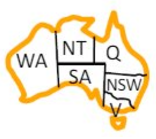

The graph can be colored using a fixed number of colors.

Here *each node* is a *variable* and the values are the colors that can be assigned to them.

Given that **the domain will be the same for all our nodes** we use a custom dict defined by the UniversalDict class.

The `UniversalDict Class` takes in a parameter and returns it as a value for all the keys of the dict.

It does not support item assignment.

A `universal dict` maps any key to the same value. 

We use it here as the domains dict for CSPs in which all variables have the same domain.

In [10]:
from src.utils import UniversalDict

In [11]:
d = UniversalDict(list('RGB'))

In [12]:
d['SA']

['R', 'G', 'B']

In [13]:
print(d)

Any from ['R', 'G', 'B']


In [14]:
australiaColors=UniversalDict(list('RGB'))

In [15]:
print(australiaColors['SA'],australiaColors['NT'])

['R', 'G', 'B'] ['R', 'G', 'B']


**!!!** remember: Our CSP Class includes the constraint parameter which should be a function f(A, a, B, b)

So, we need to define a constraint function *f(A, a, B, b)*.

In this case , we need to ensure that **the neighbors don't have the same color**

This is defined in the function `different_values_constraint` of the module `Utils.py`

In [16]:
from src.utils import different_values_constraint
help(different_values_constraint)

Help on function different_values_constraint in module src.utils:

different_values_constraint(A, a, B, b)
    A constraint saying two neighboring variables must differ in value.



The `CSP class` takes `neighbors` in the form of a *Dictionary*.

`{'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}`

A simple helper function `parse_neighbors `allows us to take input in the form of strings and return a Dict of a form that is compatible with the CSP Class.

In [17]:
from src.utils import parse_neighbors
help(parse_neighbors)

Help on function parse_neighbors in module src.utils:

parse_neighbors(neighbors)
    Convert a string of the form 'X: Y Z; Y: Z' into a dict mapping
    regions to neighbors. The syntax is a region name followed by a ':'
    followed by zero or more region names, followed by ';', repeated for
    each region name. If you say 'X: Y' you don't need 'Y: X'.
    >>> parse_neighbors('X: Y Z; Y: Z') == {'Y': ['X', 'Z'], 'X': ['Y', 'Z'], 'Z': ['X', 'Y']}
    True



In [18]:
australia="SA: WA NT Q NSW V; NT: WA Q; NSW: Q V; T: "

In [19]:
parse_neighbors(australia)

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

The `MapColoringCSP` function creates and returns a CSP with the above constraint function and states.

In [20]:
from src.CSPS import MapColoringCSP
help(MapColoringCSP)

Help on function MapColoringCSP in module src.CSPS:

MapColoringCSP(colors, neighbors)
    Make a CSP for the problem of coloring a map with different colors
    for any two adjacent regions. Arguments are a list of colors, and a
    dict of {region: [neighbor,...]} entries. This dict may also be
    specified as a string of the form defined by parse_neighbors.



In [21]:
australiaCSP = MapColoringCSP(list('RGB'), australia)

In [22]:
australiaCSP.variables

['SA', 'WA', 'NT', 'Q', 'NSW', 'V']

In [23]:
australiaCSP.domains

Any from ['R', 'G', 'B']

In [24]:
australiaCSP.neighbors

defaultdict(list,
            {'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
             'WA': ['SA', 'NT'],
             'NT': ['SA', 'WA', 'Q'],
             'Q': ['SA', 'NT', 'NSW'],
             'NSW': ['SA', 'Q', 'V'],
             'V': ['SA', 'NSW']})

## Backtracking Search

In backtracking search, we check the constraints as we go and we deal with only one variable at a time

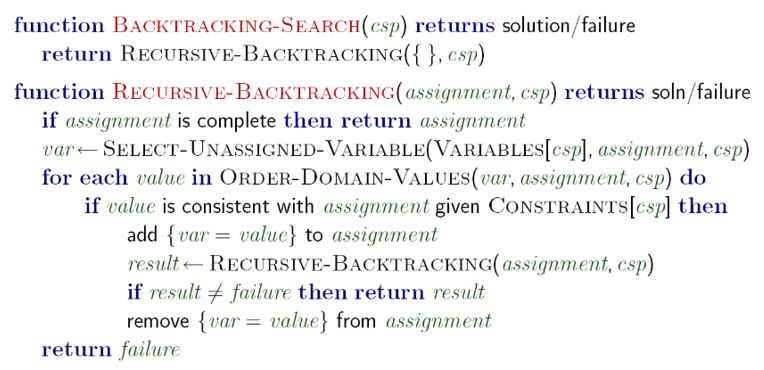

The algorithm searches **a tree of partial assignments**.

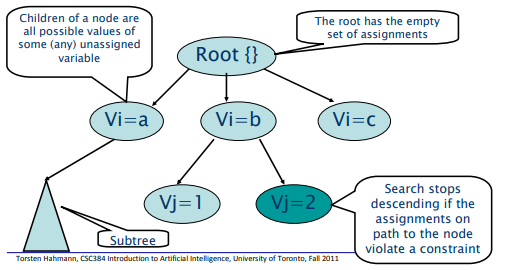

Backtracking example for Australia map-coloring

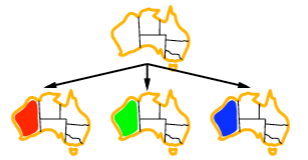

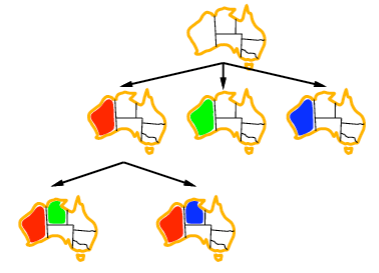

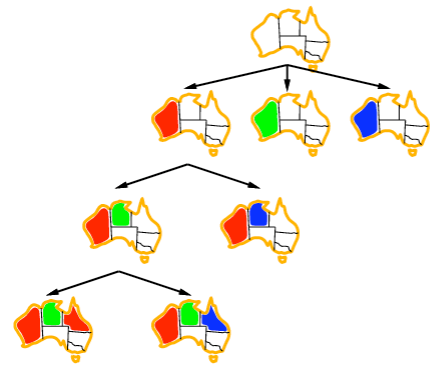


In [26]:
from src.algorithms import backtracking_search

In [27]:
result = backtracking_search(australiaCSP)

In [28]:
result

{'SA': 'R', 'WA': 'G', 'NT': 'B', 'Q': 'G', 'NSW': 'B', 'V': 'G'}

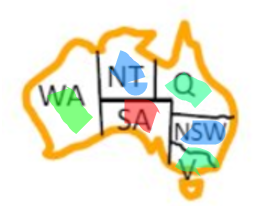

And resolve it with AC-3:

## Tasks

### Task 1. The Dinner Accomodation Problem - 20 points

Five colleagues (designated A, B, C, D, E) are planning to go to dinner but they don’t all get along.

Specifically:
* A despises B
* B always argues with E
* C is B's manager, so B does not want to be subject to the extra scrutiny of sitting next to C.

You need to place them around a dining table with 6 chairs to avoid any potential problems.

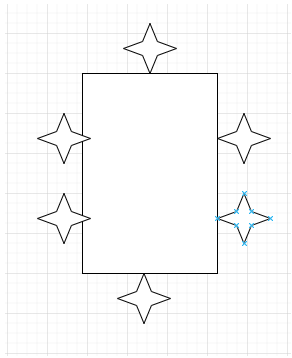

Tasks: (1-5 -> 15 points, 6-> 5 points)

1. Formulate the problem (presented above) as a CSP problem.
2. Develop CSP implementation (based on CSP class)
3. Visualize the constraints graph with PyVis
4. After running constraint propagation once without search, do any of the domains change? (Apply AC-3 for the answer). 
5. Apply a backtracking search algorithm to solve ths problem
6. Visualize the process of chairs assignment as a web-service with Streamlit (see the link of the video-example below)

### Task 2. Asterisk Sudoku - 10 points

Tasks: (1 -> 5 points, 2-> 5 points)

1. Apply a backtracking search algorithm to solve the Asterisk Sudoku (Assignment 6)
2. Visualize the process as a web-service with Streamlit (see the link of the video-example below)